In [1]:
import requests
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import gamma
import numpy as np
import time
import c3aidatalake

### Extraction of Counties

In [2]:
county_location_ids = pd.read_csv("C3-ai-Location-IDs.csv")
county_location_ids.info()
county_location_ids = county_location_ids[county_location_ids['County id'].str.contains('UnitedStates')]
county_location_ids = list(county_location_ids['County id'])
county_location_ids[319] = 'DistrictofColumbia_UnitedStates'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3693 entries, 0 to 3692
Data columns (total 19 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   County id                                   3693 non-null   object
 1   County                                      3693 non-null   object
 2   State                                       3693 non-null   object
 3   Country                                     3693 non-null   object
 4   JHU                                         3249 non-null   object
 5   NYT: Case Counts                            2972 non-null   object
 6   University of Washington                    3 non-null      object
 7   US Census Bureau: Demographic Estimates     3219 non-null   object
 8   Corona Data Scraper                         3283 non-null   object
 9   Google                                      3049 non-null   object
 10  Apple                   

### Functions for API calls to get the unemployment data. The difference betweeen the two functions is the time period 

In [9]:
def get_labor_detail(county):
    labordetail = c3aidatalake.fetch(
        "labordetail",
        {
            "spec": {
                "filter": "year == 2020 && (month == 2 || month == 3 || month == 4 ) && contains(parent, " + county + ")",
                "limit" : 3
            }
        }
    )

    labordetail.insert(0, "County", [county] * 3, True) 


    labor_detail_list = labordetail[["County", "year", "month", "unemploymentRate"]].values.tolist()
    
    
    return labor_detail_list

In [14]:
def get_labor_detail_test(county):
    labordetail = c3aidatalake.fetch(
        "labordetail",
        {
            "spec": {
                "filter": "year == 2020 && (month == 5) && contains(parent, " + county + ")",
                "limit" : 1
            }
        }
    )

    labordetail.insert(0, "County", [county], True) 


    labor_detail_list = labordetail[["County", "year", "month", "unemploymentRate"]].values.tolist()
    
    
    return labor_detail_list

# Creating the Test Data

This code tries to call the API on each county. Certain formatting is needed to make the API call. 

In [15]:
cols = ['County', "Year", "Month", "unemploymentRate"]
temporal_df = pd.DataFrame(columns=cols)

for i in range(len(county_location_ids)):
    
    
    county = "'" + county_location_ids[i] + "'"
    
    try: 
        labor_detail_list = get_labor_detail_test(county)
    except:
        try:
            county2 = county_location_ids[i].replace(".", "")
            county2 = "'" + county2 + "'"
            labor_detail_list = get_labor_detail(county2)
        except:
            print("Totally can't find it", county)
            labor_detail_list = [[county, -1, -1, -1]]
    
    
    temp = pd.DataFrame(labor_detail_list, columns=cols)
    temporal_df = temporal_df.append(temp, ignore_index=True)
    print(county)

'Autauga_Alabama_UnitedStates'
'Baldwin_Alabama_UnitedStates'
'Barbour_Alabama_UnitedStates'
'Bibb_Alabama_UnitedStates'
'Blount_Alabama_UnitedStates'
'Bullock_Alabama_UnitedStates'
'Butler_Alabama_UnitedStates'
'Calhoun_Alabama_UnitedStates'
'Chambers_Alabama_UnitedStates'
'Cherokee_Alabama_UnitedStates'
'Chilton_Alabama_UnitedStates'
'Choctaw_Alabama_UnitedStates'
'Clarke_Alabama_UnitedStates'
'Clay_Alabama_UnitedStates'
'Cleburne_Alabama_UnitedStates'
'Coffee_Alabama_UnitedStates'
'Colbert_Alabama_UnitedStates'
'Conecuh_Alabama_UnitedStates'
'Coosa_Alabama_UnitedStates'
'Covington_Alabama_UnitedStates'
'Crenshaw_Alabama_UnitedStates'
'Cullman_Alabama_UnitedStates'
'Dale_Alabama_UnitedStates'
'Dallas_Alabama_UnitedStates'
'DeKalb_Alabama_UnitedStates'
'Elmore_Alabama_UnitedStates'
'Escambia_Alabama_UnitedStates'
'Etowah_Alabama_UnitedStates'
'Fayette_Alabama_UnitedStates'
'Franklin_Alabama_UnitedStates'
'Geneva_Alabama_UnitedStates'
'Greene_Alabama_UnitedStates'
'Hale_Alabama_UnitedS

'ClearCreek_Colorado_UnitedStates'
'Conejos_Colorado_UnitedStates'
'Costilla_Colorado_UnitedStates'
'Crowley_Colorado_UnitedStates'
'Custer_Colorado_UnitedStates'
'Delta_Colorado_UnitedStates'
'Denver_Colorado_UnitedStates'
'Dolores_Colorado_UnitedStates'
'Douglas_Colorado_UnitedStates'
'Eagle_Colorado_UnitedStates'
'Elbert_Colorado_UnitedStates'
'ElPaso_Colorado_UnitedStates'
'Fremont_Colorado_UnitedStates'
'Garfield_Colorado_UnitedStates'
'Gilpin_Colorado_UnitedStates'
'Grand_Colorado_UnitedStates'
'Gunnison_Colorado_UnitedStates'
'Hinsdale_Colorado_UnitedStates'
'Huerfano_Colorado_UnitedStates'
'Jackson_Colorado_UnitedStates'
'Jefferson_Colorado_UnitedStates'
'Kiowa_Colorado_UnitedStates'
'KitCarson_Colorado_UnitedStates'
'Lake_Colorado_UnitedStates'
'LaPlata_Colorado_UnitedStates'
'Larimer_Colorado_UnitedStates'
'LasAnimas_Colorado_UnitedStates'
'Lincoln_Colorado_UnitedStates'
'Logan_Colorado_UnitedStates'
'Mesa_Colorado_UnitedStates'
'Mineral_Colorado_UnitedStates'
'Moffat_Colorad

'Tattnall_Georgia_UnitedStates'
'Taylor_Georgia_UnitedStates'
'Telfair_Georgia_UnitedStates'
'Terrell_Georgia_UnitedStates'
'Thomas_Georgia_UnitedStates'
'Tift_Georgia_UnitedStates'
'Toombs_Georgia_UnitedStates'
'Towns_Georgia_UnitedStates'
'Treutlen_Georgia_UnitedStates'
'Troup_Georgia_UnitedStates'
'Turner_Georgia_UnitedStates'
'Twiggs_Georgia_UnitedStates'
'Union_Georgia_UnitedStates'
'Upson_Georgia_UnitedStates'
'Walker_Georgia_UnitedStates'
'Walton_Georgia_UnitedStates'
'Ware_Georgia_UnitedStates'
'Warren_Georgia_UnitedStates'
'Washington_Georgia_UnitedStates'
'Wayne_Georgia_UnitedStates'
'Webster_Georgia_UnitedStates'
'Wheeler_Georgia_UnitedStates'
'White_Georgia_UnitedStates'
'Whitfield_Georgia_UnitedStates'
'Wilcox_Georgia_UnitedStates'
'Wilkes_Georgia_UnitedStates'
'Wilkinson_Georgia_UnitedStates'
'Worth_Georgia_UnitedStates'
'Hawaii_Hawaii_UnitedStates'
'Honolulu_Hawaii_UnitedStates'
Totally can't find it 'Kalawao_Hawaii_UnitedStates'
'Kalawao_Hawaii_UnitedStates'
'Kauai_Hawa

'Wayne_Indiana_UnitedStates'
'Wells_Indiana_UnitedStates'
'White_Indiana_UnitedStates'
'Whitley_Indiana_UnitedStates'
'Adair_Iowa_UnitedStates'
'Adams_Iowa_UnitedStates'
'Allamakee_Iowa_UnitedStates'
'Appanoose_Iowa_UnitedStates'
'Audubon_Iowa_UnitedStates'
'Benton_Iowa_UnitedStates'
'BlackHawk_Iowa_UnitedStates'
'Boone_Iowa_UnitedStates'
'Bremer_Iowa_UnitedStates'
'Buchanan_Iowa_UnitedStates'
'BuenaVista_Iowa_UnitedStates'
'Butler_Iowa_UnitedStates'
'Calhoun_Iowa_UnitedStates'
'Carroll_Iowa_UnitedStates'
'Cass_Iowa_UnitedStates'
'Cedar_Iowa_UnitedStates'
'CerroGordo_Iowa_UnitedStates'
'Cherokee_Iowa_UnitedStates'
'Chickasaw_Iowa_UnitedStates'
'Clarke_Iowa_UnitedStates'
'Clay_Iowa_UnitedStates'
'Clayton_Iowa_UnitedStates'
'Clinton_Iowa_UnitedStates'
'Crawford_Iowa_UnitedStates'
'Dallas_Iowa_UnitedStates'
'Davis_Iowa_UnitedStates'
'Decatur_Iowa_UnitedStates'
'Delaware_Iowa_UnitedStates'
'DesMoines_Iowa_UnitedStates'
'Dickinson_Iowa_UnitedStates'
'Dubuque_Iowa_UnitedStates'
'Emmet_Iowa_U

'Logan_Kentucky_UnitedStates'
'Lyon_Kentucky_UnitedStates'
'McCracken_Kentucky_UnitedStates'
'McCreary_Kentucky_UnitedStates'
'McLean_Kentucky_UnitedStates'
'Madison_Kentucky_UnitedStates'
'Magoffin_Kentucky_UnitedStates'
'Marion_Kentucky_UnitedStates'
'Marshall_Kentucky_UnitedStates'
'Martin_Kentucky_UnitedStates'
'Mason_Kentucky_UnitedStates'
'Meade_Kentucky_UnitedStates'
'Menifee_Kentucky_UnitedStates'
'Mercer_Kentucky_UnitedStates'
'Metcalfe_Kentucky_UnitedStates'
'Monroe_Kentucky_UnitedStates'
'Montgomery_Kentucky_UnitedStates'
'Morgan_Kentucky_UnitedStates'
'Muhlenberg_Kentucky_UnitedStates'
'Nelson_Kentucky_UnitedStates'
'Nicholas_Kentucky_UnitedStates'
'Ohio_Kentucky_UnitedStates'
'Oldham_Kentucky_UnitedStates'
'Owen_Kentucky_UnitedStates'
'Owsley_Kentucky_UnitedStates'
'Pendleton_Kentucky_UnitedStates'
'Perry_Kentucky_UnitedStates'
'Pike_Kentucky_UnitedStates'
'Powell_Kentucky_UnitedStates'
'Pulaski_Kentucky_UnitedStates'
'Robertson_Kentucky_UnitedStates'
'Rockcastle_Kentucky_

'Schoolcraft_Michigan_UnitedStates'
'Shiawassee_Michigan_UnitedStates'
'Tuscola_Michigan_UnitedStates'
'VanBuren_Michigan_UnitedStates'
'Washtenaw_Michigan_UnitedStates'
'Wayne_Michigan_UnitedStates'
'Wexford_Michigan_UnitedStates'
'Aitkin_Minnesota_UnitedStates'
'Anoka_Minnesota_UnitedStates'
'Becker_Minnesota_UnitedStates'
'Beltrami_Minnesota_UnitedStates'
'Benton_Minnesota_UnitedStates'
'BigStone_Minnesota_UnitedStates'
'BlueEarth_Minnesota_UnitedStates'
'Brown_Minnesota_UnitedStates'
'Carlton_Minnesota_UnitedStates'
'Carver_Minnesota_UnitedStates'
'Cass_Minnesota_UnitedStates'
'Chippewa_Minnesota_UnitedStates'
'Chisago_Minnesota_UnitedStates'
'Clay_Minnesota_UnitedStates'
'Clearwater_Minnesota_UnitedStates'
'Cook_Minnesota_UnitedStates'
'Cottonwood_Minnesota_UnitedStates'
'CrowWing_Minnesota_UnitedStates'
'Dakota_Minnesota_UnitedStates'
'Dodge_Minnesota_UnitedStates'
'Douglas_Minnesota_UnitedStates'
'Faribault_Minnesota_UnitedStates'
'Fillmore_Minnesota_UnitedStates'
'Freeborn_Minn

'NewMadrid_Missouri_UnitedStates'
'Newton_Missouri_UnitedStates'
'Nodaway_Missouri_UnitedStates'
'Oregon_Missouri_UnitedStates'
'Osage_Missouri_UnitedStates'
'Ozark_Missouri_UnitedStates'
'Pemiscot_Missouri_UnitedStates'
'Perry_Missouri_UnitedStates'
'Pettis_Missouri_UnitedStates'
'Phelps_Missouri_UnitedStates'
'Pike_Missouri_UnitedStates'
'Platte_Missouri_UnitedStates'
'Polk_Missouri_UnitedStates'
'Pulaski_Missouri_UnitedStates'
'Putnam_Missouri_UnitedStates'
'Ralls_Missouri_UnitedStates'
'Randolph_Missouri_UnitedStates'
'Ray_Missouri_UnitedStates'
'Reynolds_Missouri_UnitedStates'
'Ripley_Missouri_UnitedStates'
'St.Charles_Missouri_UnitedStates'
'St.Clair_Missouri_UnitedStates'
'Ste.Genevieve_Missouri_UnitedStates'
'St.Francois_Missouri_UnitedStates'
'St.Louis_Missouri_UnitedStates'
'Saline_Missouri_UnitedStates'
'Schuyler_Missouri_UnitedStates'
'Scotland_Missouri_UnitedStates'
'Scott_Missouri_UnitedStates'
'Shannon_Missouri_UnitedStates'
'Shelby_Missouri_UnitedStates'
'Stoddard_Misso

'McKinley_NewMexico_UnitedStates'
'Mora_NewMexico_UnitedStates'
'Otero_NewMexico_UnitedStates'
'Quay_NewMexico_UnitedStates'
'RioArriba_NewMexico_UnitedStates'
'Roosevelt_NewMexico_UnitedStates'
'Sandoval_NewMexico_UnitedStates'
'SanJuan_NewMexico_UnitedStates'
'SanMiguel_NewMexico_UnitedStates'
'SantaFe_NewMexico_UnitedStates'
'Sierra_NewMexico_UnitedStates'
'Socorro_NewMexico_UnitedStates'
'Taos_NewMexico_UnitedStates'
'Torrance_NewMexico_UnitedStates'
'Union_NewMexico_UnitedStates'
'Valencia_NewMexico_UnitedStates'
'Albany_NewYork_UnitedStates'
'Allegany_NewYork_UnitedStates'
'Bronx_NewYork_UnitedStates'
'Broome_NewYork_UnitedStates'
'Cattaraugus_NewYork_UnitedStates'
'Cayuga_NewYork_UnitedStates'
'Chautauqua_NewYork_UnitedStates'
'Chemung_NewYork_UnitedStates'
'Chenango_NewYork_UnitedStates'
'Clinton_NewYork_UnitedStates'
'Columbia_NewYork_UnitedStates'
'Cortland_NewYork_UnitedStates'
'Delaware_NewYork_UnitedStates'
'Dutchess_NewYork_UnitedStates'
'Erie_NewYork_UnitedStates'
'Essex

'Auglaize_Ohio_UnitedStates'
'Belmont_Ohio_UnitedStates'
'Brown_Ohio_UnitedStates'
'Butler_Ohio_UnitedStates'
'Carroll_Ohio_UnitedStates'
'Champaign_Ohio_UnitedStates'
'Clark_Ohio_UnitedStates'
'Clermont_Ohio_UnitedStates'
'Clinton_Ohio_UnitedStates'
'Columbiana_Ohio_UnitedStates'
'Coshocton_Ohio_UnitedStates'
'Crawford_Ohio_UnitedStates'
'Cuyahoga_Ohio_UnitedStates'
'Darke_Ohio_UnitedStates'
'Defiance_Ohio_UnitedStates'
'Delaware_Ohio_UnitedStates'
'Erie_Ohio_UnitedStates'
'Fairfield_Ohio_UnitedStates'
'Fayette_Ohio_UnitedStates'
'Franklin_Ohio_UnitedStates'
'Fulton_Ohio_UnitedStates'
'Gallia_Ohio_UnitedStates'
'Geauga_Ohio_UnitedStates'
'Greene_Ohio_UnitedStates'
'Guernsey_Ohio_UnitedStates'
'Hamilton_Ohio_UnitedStates'
'Hancock_Ohio_UnitedStates'
'Hardin_Ohio_UnitedStates'
'Harrison_Ohio_UnitedStates'
'Henry_Ohio_UnitedStates'
'Highland_Ohio_UnitedStates'
'Hocking_Ohio_UnitedStates'
'Holmes_Ohio_UnitedStates'
'Huron_Ohio_UnitedStates'
'Jackson_Ohio_UnitedStates'
'Jefferson_Ohio_Unit

'York_Pennsylvania_UnitedStates'
'Bristol_RhodeIsland_UnitedStates'
'Kent_RhodeIsland_UnitedStates'
'Newport_RhodeIsland_UnitedStates'
'Providence_RhodeIsland_UnitedStates'
'Washington_RhodeIsland_UnitedStates'
'Abbeville_SouthCarolina_UnitedStates'
'Aiken_SouthCarolina_UnitedStates'
'Allendale_SouthCarolina_UnitedStates'
'Anderson_SouthCarolina_UnitedStates'
'Bamberg_SouthCarolina_UnitedStates'
'Barnwell_SouthCarolina_UnitedStates'
'Beaufort_SouthCarolina_UnitedStates'
'Berkeley_SouthCarolina_UnitedStates'
'Calhoun_SouthCarolina_UnitedStates'
'Charleston_SouthCarolina_UnitedStates'
'Cherokee_SouthCarolina_UnitedStates'
'Chester_SouthCarolina_UnitedStates'
'Chesterfield_SouthCarolina_UnitedStates'
'Clarendon_SouthCarolina_UnitedStates'
'Colleton_SouthCarolina_UnitedStates'
'Darlington_SouthCarolina_UnitedStates'
'Dillon_SouthCarolina_UnitedStates'
'Dorchester_SouthCarolina_UnitedStates'
'Edgefield_SouthCarolina_UnitedStates'
'Fairfield_SouthCarolina_UnitedStates'
'Florence_SouthCarolin

'Cameron_Texas_UnitedStates'
'Camp_Texas_UnitedStates'
'Carson_Texas_UnitedStates'
'Cass_Texas_UnitedStates'
'Castro_Texas_UnitedStates'
'Chambers_Texas_UnitedStates'
'Cherokee_Texas_UnitedStates'
'Childress_Texas_UnitedStates'
'Clay_Texas_UnitedStates'
'Cochran_Texas_UnitedStates'
'Coke_Texas_UnitedStates'
'Coleman_Texas_UnitedStates'
'Collin_Texas_UnitedStates'
'Collingsworth_Texas_UnitedStates'
'Colorado_Texas_UnitedStates'
'Comal_Texas_UnitedStates'
'Comanche_Texas_UnitedStates'
'Concho_Texas_UnitedStates'
'Cooke_Texas_UnitedStates'
'Coryell_Texas_UnitedStates'
'Cottle_Texas_UnitedStates'
'Crane_Texas_UnitedStates'
'Crockett_Texas_UnitedStates'
'Crosby_Texas_UnitedStates'
'Culberson_Texas_UnitedStates'
'Dallam_Texas_UnitedStates'
'Dallas_Texas_UnitedStates'
'Dawson_Texas_UnitedStates'
'DeafSmith_Texas_UnitedStates'
'Delta_Texas_UnitedStates'
'Denton_Texas_UnitedStates'
'DeWitt_Texas_UnitedStates'
'Dickens_Texas_UnitedStates'
'Dimmit_Texas_UnitedStates'
'Donley_Texas_UnitedStates'
'

'Carroll_Virginia_UnitedStates'
'CharlesCity_Virginia_UnitedStates'
'Charlotte_Virginia_UnitedStates'
'Chesterfield_Virginia_UnitedStates'
'Clarke_Virginia_UnitedStates'
'Craig_Virginia_UnitedStates'
'Culpeper_Virginia_UnitedStates'
'Cumberland_Virginia_UnitedStates'
'Dickenson_Virginia_UnitedStates'
'Dinwiddie_Virginia_UnitedStates'
'Essex_Virginia_UnitedStates'
'Fairfax_Virginia_UnitedStates'
'Fauquier_Virginia_UnitedStates'
'Floyd_Virginia_UnitedStates'
'Fluvanna_Virginia_UnitedStates'
'Franklin_Virginia_UnitedStates'
'Frederick_Virginia_UnitedStates'
'Giles_Virginia_UnitedStates'
'Gloucester_Virginia_UnitedStates'
'Goochland_Virginia_UnitedStates'
'Grayson_Virginia_UnitedStates'
'Greene_Virginia_UnitedStates'
'Greensville_Virginia_UnitedStates'
'Halifax_Virginia_UnitedStates'
'Hanover_Virginia_UnitedStates'
'Henrico_Virginia_UnitedStates'
'Henry_Virginia_UnitedStates'
'Highland_Virginia_UnitedStates'
'IsleofWight_Virginia_UnitedStates'
'JamesCity_Virginia_UnitedStates'
'KingandQuee

'Forest_Wisconsin_UnitedStates'
'Grant_Wisconsin_UnitedStates'
'Green_Wisconsin_UnitedStates'
'GreenLake_Wisconsin_UnitedStates'
'Iowa_Wisconsin_UnitedStates'
'Iron_Wisconsin_UnitedStates'
'Jackson_Wisconsin_UnitedStates'
'Jefferson_Wisconsin_UnitedStates'
'Juneau_Wisconsin_UnitedStates'
'Kenosha_Wisconsin_UnitedStates'
'Kewaunee_Wisconsin_UnitedStates'
'LaCrosse_Wisconsin_UnitedStates'
'Lafayette_Wisconsin_UnitedStates'
'Langlade_Wisconsin_UnitedStates'
'Lincoln_Wisconsin_UnitedStates'
'Manitowoc_Wisconsin_UnitedStates'
'Marathon_Wisconsin_UnitedStates'
'Marinette_Wisconsin_UnitedStates'
'Marquette_Wisconsin_UnitedStates'
'Menominee_Wisconsin_UnitedStates'
'Milwaukee_Wisconsin_UnitedStates'
'Monroe_Wisconsin_UnitedStates'
'Oconto_Wisconsin_UnitedStates'
'Oneida_Wisconsin_UnitedStates'
'Outagamie_Wisconsin_UnitedStates'
'Ozaukee_Wisconsin_UnitedStates'
'Pepin_Wisconsin_UnitedStates'
'Pierce_Wisconsin_UnitedStates'
'Polk_Wisconsin_UnitedStates'
'Portage_Wisconsin_UnitedStates'
'Price_Wi

Totally can't find it 'Unassigned_Illinois_UnitedStates'
'Unassigned_Illinois_UnitedStates'
Totally can't find it 'Unassigned_Indiana_UnitedStates'
'Unassigned_Indiana_UnitedStates'
Totally can't find it 'Unassigned_Iowa_UnitedStates'
'Unassigned_Iowa_UnitedStates'
Totally can't find it 'Unassigned_Kansas_UnitedStates'
'Unassigned_Kansas_UnitedStates'
Totally can't find it 'Unassigned_Kentucky_UnitedStates'
'Unassigned_Kentucky_UnitedStates'
Totally can't find it 'Unassigned_Louisiana_UnitedStates'
'Unassigned_Louisiana_UnitedStates'
Totally can't find it 'Unassigned_Maine_UnitedStates'
'Unassigned_Maine_UnitedStates'
Totally can't find it 'Unassigned_Maryland_UnitedStates'
'Unassigned_Maryland_UnitedStates'
Totally can't find it 'Unassigned_Massachusetts_UnitedStates'
'Unassigned_Massachusetts_UnitedStates'
Totally can't find it 'Unassigned_Michigan_UnitedStates'
'Unassigned_Michigan_UnitedStates'
Totally can't find it 'Unassigned_Minnesota_UnitedStates'
'Unassigned_Minnesota_UnitedSt

Totally can't find it 'DenaliBorough,Yukon-KoyukukCensusArea,SoutheastFairbanksCensusArea,FairbanksNorthStar_Alaska_UnitedStates'
'DenaliBorough,Yukon-KoyukukCensusArea,SoutheastFairbanksCensusArea,FairbanksNorthStar_Alaska_UnitedStates'
Totally can't find it 'Shannon_SouthDakota_UnitedStates'
'Shannon_SouthDakota_UnitedStates'
Totally can't find it 'St.CroixIsland_VirginIslands_UnitedStates'
'St.CroixIsland_VirginIslands_UnitedStates'
Totally can't find it 'St.ThomasIsland_VirginIslands_UnitedStates'
'St.ThomasIsland_VirginIslands_UnitedStates'


In [16]:
temporal_df.to_csv('temporal_test.csv')

In [17]:
temporal_df

,County,Year,Month,unemploymentRate
0,'Autauga_Alabama_UnitedStates',2020,5,7.789416
1,'Baldwin_Alabama_UnitedStates',2020,5,9.385678
2,'Barbour_Alabama_UnitedStates',2020,5,8.655172
3,'Bibb_Alabama_UnitedStates',2020,5,10.687543
4,'Blount_Alabama_UnitedStates',2020,5,6.378132
...,...,...,...,...
3390,"'UintahCounty,DuchesneCounty,Daggett_Utah_Unit...",-1,-1,-1.000000
3391,"'DenaliBorough,Yukon-KoyukukCensusArea,Southea...",-1,-1,-1.000000
3392,'Shannon_SouthDakota_UnitedStates',-1,-1,-1.000000
3393,'St.CroixIsland_VirginIslands_UnitedStates',-1,-1,-1.000000


# Creating the Train Data

This code tries to call the API on each county. Certain formatting is needed to make the API call. 

In [4]:
cols = ['County', "Year", "Month", "unemploymentRate"]
temporal_df = pd.DataFrame(columns=cols)

for i in range(len(county_location_ids)):
    
    
    county = "'" + county_location_ids[i] + "'"
    
    try: 
        labor_detail_list = get_labor_detail(county)
    except:
        try:
            county2 = county_location_ids[i].replace(".", "")
            county2 = "'" + county2 + "'"
            labor_detail_list = get_labor_detail(county2)
        except:
            print("Totally can't find it", county)
            labor_detail_list = [[county, -1, -1, -1]]
    
    
    temp = pd.DataFrame(labor_detail_list, columns=cols)
    temporal_df = temporal_df.append(temp, ignore_index=True)
    
    print(county)

'Autauga_Alabama_UnitedStates'
'Baldwin_Alabama_UnitedStates'
'Barbour_Alabama_UnitedStates'
'Bibb_Alabama_UnitedStates'
'Blount_Alabama_UnitedStates'
'Bullock_Alabama_UnitedStates'
'Butler_Alabama_UnitedStates'
'Calhoun_Alabama_UnitedStates'
'Chambers_Alabama_UnitedStates'
'Cherokee_Alabama_UnitedStates'
'Chilton_Alabama_UnitedStates'
'Choctaw_Alabama_UnitedStates'
'Clarke_Alabama_UnitedStates'
'Clay_Alabama_UnitedStates'
'Cleburne_Alabama_UnitedStates'
'Coffee_Alabama_UnitedStates'
'Colbert_Alabama_UnitedStates'
'Conecuh_Alabama_UnitedStates'
'Coosa_Alabama_UnitedStates'
'Covington_Alabama_UnitedStates'
'Crenshaw_Alabama_UnitedStates'
'Cullman_Alabama_UnitedStates'
'Dale_Alabama_UnitedStates'
'Dallas_Alabama_UnitedStates'
'DeKalb_Alabama_UnitedStates'
'Elmore_Alabama_UnitedStates'
'Escambia_Alabama_UnitedStates'
'Etowah_Alabama_UnitedStates'
'Fayette_Alabama_UnitedStates'
'Franklin_Alabama_UnitedStates'
'Geneva_Alabama_UnitedStates'
'Greene_Alabama_UnitedStates'
'Hale_Alabama_UnitedS

'ClearCreek_Colorado_UnitedStates'
'Conejos_Colorado_UnitedStates'
'Costilla_Colorado_UnitedStates'
'Crowley_Colorado_UnitedStates'
'Custer_Colorado_UnitedStates'
'Delta_Colorado_UnitedStates'
'Denver_Colorado_UnitedStates'
'Dolores_Colorado_UnitedStates'
'Douglas_Colorado_UnitedStates'
'Eagle_Colorado_UnitedStates'
'Elbert_Colorado_UnitedStates'
'ElPaso_Colorado_UnitedStates'
'Fremont_Colorado_UnitedStates'
'Garfield_Colorado_UnitedStates'
'Gilpin_Colorado_UnitedStates'
'Grand_Colorado_UnitedStates'
'Gunnison_Colorado_UnitedStates'
'Hinsdale_Colorado_UnitedStates'
'Huerfano_Colorado_UnitedStates'
'Jackson_Colorado_UnitedStates'
'Jefferson_Colorado_UnitedStates'
'Kiowa_Colorado_UnitedStates'
'KitCarson_Colorado_UnitedStates'
'Lake_Colorado_UnitedStates'
'LaPlata_Colorado_UnitedStates'
'Larimer_Colorado_UnitedStates'
'LasAnimas_Colorado_UnitedStates'
'Lincoln_Colorado_UnitedStates'
'Logan_Colorado_UnitedStates'
'Mesa_Colorado_UnitedStates'
'Mineral_Colorado_UnitedStates'
'Moffat_Colorad

'Tattnall_Georgia_UnitedStates'
'Taylor_Georgia_UnitedStates'
'Telfair_Georgia_UnitedStates'
'Terrell_Georgia_UnitedStates'
'Thomas_Georgia_UnitedStates'
'Tift_Georgia_UnitedStates'
'Toombs_Georgia_UnitedStates'
'Towns_Georgia_UnitedStates'
'Treutlen_Georgia_UnitedStates'
'Troup_Georgia_UnitedStates'
'Turner_Georgia_UnitedStates'
'Twiggs_Georgia_UnitedStates'
'Union_Georgia_UnitedStates'
'Upson_Georgia_UnitedStates'
'Walker_Georgia_UnitedStates'
'Walton_Georgia_UnitedStates'
'Ware_Georgia_UnitedStates'
'Warren_Georgia_UnitedStates'
'Washington_Georgia_UnitedStates'
'Wayne_Georgia_UnitedStates'
'Webster_Georgia_UnitedStates'
'Wheeler_Georgia_UnitedStates'
'White_Georgia_UnitedStates'
'Whitfield_Georgia_UnitedStates'
'Wilcox_Georgia_UnitedStates'
'Wilkes_Georgia_UnitedStates'
'Wilkinson_Georgia_UnitedStates'
'Worth_Georgia_UnitedStates'
'Hawaii_Hawaii_UnitedStates'
'Honolulu_Hawaii_UnitedStates'
Totally can't find it 'Kalawao_Hawaii_UnitedStates'
'Kalawao_Hawaii_UnitedStates'
'Kauai_Hawa

'Wayne_Indiana_UnitedStates'
'Wells_Indiana_UnitedStates'
'White_Indiana_UnitedStates'
'Whitley_Indiana_UnitedStates'
'Adair_Iowa_UnitedStates'
'Adams_Iowa_UnitedStates'
'Allamakee_Iowa_UnitedStates'
'Appanoose_Iowa_UnitedStates'
'Audubon_Iowa_UnitedStates'
'Benton_Iowa_UnitedStates'
'BlackHawk_Iowa_UnitedStates'
'Boone_Iowa_UnitedStates'
'Bremer_Iowa_UnitedStates'
'Buchanan_Iowa_UnitedStates'
'BuenaVista_Iowa_UnitedStates'
'Butler_Iowa_UnitedStates'
'Calhoun_Iowa_UnitedStates'
'Carroll_Iowa_UnitedStates'
'Cass_Iowa_UnitedStates'
'Cedar_Iowa_UnitedStates'
'CerroGordo_Iowa_UnitedStates'
'Cherokee_Iowa_UnitedStates'
'Chickasaw_Iowa_UnitedStates'
'Clarke_Iowa_UnitedStates'
'Clay_Iowa_UnitedStates'
'Clayton_Iowa_UnitedStates'
'Clinton_Iowa_UnitedStates'
'Crawford_Iowa_UnitedStates'
'Dallas_Iowa_UnitedStates'
'Davis_Iowa_UnitedStates'
'Decatur_Iowa_UnitedStates'
'Delaware_Iowa_UnitedStates'
'DesMoines_Iowa_UnitedStates'
'Dickinson_Iowa_UnitedStates'
'Dubuque_Iowa_UnitedStates'
'Emmet_Iowa_U

'Logan_Kentucky_UnitedStates'
'Lyon_Kentucky_UnitedStates'
'McCracken_Kentucky_UnitedStates'
'McCreary_Kentucky_UnitedStates'
'McLean_Kentucky_UnitedStates'
'Madison_Kentucky_UnitedStates'
'Magoffin_Kentucky_UnitedStates'
'Marion_Kentucky_UnitedStates'
'Marshall_Kentucky_UnitedStates'
'Martin_Kentucky_UnitedStates'
'Mason_Kentucky_UnitedStates'
'Meade_Kentucky_UnitedStates'
'Menifee_Kentucky_UnitedStates'
'Mercer_Kentucky_UnitedStates'
'Metcalfe_Kentucky_UnitedStates'
'Monroe_Kentucky_UnitedStates'
'Montgomery_Kentucky_UnitedStates'
'Morgan_Kentucky_UnitedStates'
'Muhlenberg_Kentucky_UnitedStates'
'Nelson_Kentucky_UnitedStates'
'Nicholas_Kentucky_UnitedStates'
'Ohio_Kentucky_UnitedStates'
'Oldham_Kentucky_UnitedStates'
'Owen_Kentucky_UnitedStates'
'Owsley_Kentucky_UnitedStates'
'Pendleton_Kentucky_UnitedStates'
'Perry_Kentucky_UnitedStates'
'Pike_Kentucky_UnitedStates'
'Powell_Kentucky_UnitedStates'
'Pulaski_Kentucky_UnitedStates'
'Robertson_Kentucky_UnitedStates'
'Rockcastle_Kentucky_

'Schoolcraft_Michigan_UnitedStates'
'Shiawassee_Michigan_UnitedStates'
'Tuscola_Michigan_UnitedStates'
'VanBuren_Michigan_UnitedStates'
'Washtenaw_Michigan_UnitedStates'
'Wayne_Michigan_UnitedStates'
'Wexford_Michigan_UnitedStates'
'Aitkin_Minnesota_UnitedStates'
'Anoka_Minnesota_UnitedStates'
'Becker_Minnesota_UnitedStates'
'Beltrami_Minnesota_UnitedStates'
'Benton_Minnesota_UnitedStates'
'BigStone_Minnesota_UnitedStates'
'BlueEarth_Minnesota_UnitedStates'
'Brown_Minnesota_UnitedStates'
'Carlton_Minnesota_UnitedStates'
'Carver_Minnesota_UnitedStates'
'Cass_Minnesota_UnitedStates'
'Chippewa_Minnesota_UnitedStates'
'Chisago_Minnesota_UnitedStates'
'Clay_Minnesota_UnitedStates'
'Clearwater_Minnesota_UnitedStates'
'Cook_Minnesota_UnitedStates'
'Cottonwood_Minnesota_UnitedStates'
'CrowWing_Minnesota_UnitedStates'
'Dakota_Minnesota_UnitedStates'
'Dodge_Minnesota_UnitedStates'
'Douglas_Minnesota_UnitedStates'
'Faribault_Minnesota_UnitedStates'
'Fillmore_Minnesota_UnitedStates'
'Freeborn_Minn

'NewMadrid_Missouri_UnitedStates'
'Newton_Missouri_UnitedStates'
'Nodaway_Missouri_UnitedStates'
'Oregon_Missouri_UnitedStates'
'Osage_Missouri_UnitedStates'
'Ozark_Missouri_UnitedStates'
'Pemiscot_Missouri_UnitedStates'
'Perry_Missouri_UnitedStates'
'Pettis_Missouri_UnitedStates'
'Phelps_Missouri_UnitedStates'
'Pike_Missouri_UnitedStates'
'Platte_Missouri_UnitedStates'
'Polk_Missouri_UnitedStates'
'Pulaski_Missouri_UnitedStates'
'Putnam_Missouri_UnitedStates'
'Ralls_Missouri_UnitedStates'
'Randolph_Missouri_UnitedStates'
'Ray_Missouri_UnitedStates'
'Reynolds_Missouri_UnitedStates'
'Ripley_Missouri_UnitedStates'
'St.Charles_Missouri_UnitedStates'
'St.Clair_Missouri_UnitedStates'
'Ste.Genevieve_Missouri_UnitedStates'
'St.Francois_Missouri_UnitedStates'
'St.Louis_Missouri_UnitedStates'
'Saline_Missouri_UnitedStates'
'Schuyler_Missouri_UnitedStates'
'Scotland_Missouri_UnitedStates'
'Scott_Missouri_UnitedStates'
'Shannon_Missouri_UnitedStates'
'Shelby_Missouri_UnitedStates'
'Stoddard_Misso

'McKinley_NewMexico_UnitedStates'
'Mora_NewMexico_UnitedStates'
'Otero_NewMexico_UnitedStates'
'Quay_NewMexico_UnitedStates'
'RioArriba_NewMexico_UnitedStates'
'Roosevelt_NewMexico_UnitedStates'
'Sandoval_NewMexico_UnitedStates'
'SanJuan_NewMexico_UnitedStates'
'SanMiguel_NewMexico_UnitedStates'
'SantaFe_NewMexico_UnitedStates'
'Sierra_NewMexico_UnitedStates'
'Socorro_NewMexico_UnitedStates'
'Taos_NewMexico_UnitedStates'
'Torrance_NewMexico_UnitedStates'
'Union_NewMexico_UnitedStates'
'Valencia_NewMexico_UnitedStates'
'Albany_NewYork_UnitedStates'
'Allegany_NewYork_UnitedStates'
'Bronx_NewYork_UnitedStates'
'Broome_NewYork_UnitedStates'
'Cattaraugus_NewYork_UnitedStates'
'Cayuga_NewYork_UnitedStates'
'Chautauqua_NewYork_UnitedStates'
'Chemung_NewYork_UnitedStates'
'Chenango_NewYork_UnitedStates'
'Clinton_NewYork_UnitedStates'
'Columbia_NewYork_UnitedStates'
'Cortland_NewYork_UnitedStates'
'Delaware_NewYork_UnitedStates'
'Dutchess_NewYork_UnitedStates'
'Erie_NewYork_UnitedStates'
'Essex

'Auglaize_Ohio_UnitedStates'
'Belmont_Ohio_UnitedStates'
'Brown_Ohio_UnitedStates'
'Butler_Ohio_UnitedStates'
'Carroll_Ohio_UnitedStates'
'Champaign_Ohio_UnitedStates'
'Clark_Ohio_UnitedStates'
'Clermont_Ohio_UnitedStates'
'Clinton_Ohio_UnitedStates'
'Columbiana_Ohio_UnitedStates'
'Coshocton_Ohio_UnitedStates'
'Crawford_Ohio_UnitedStates'
'Cuyahoga_Ohio_UnitedStates'
'Darke_Ohio_UnitedStates'
'Defiance_Ohio_UnitedStates'
'Delaware_Ohio_UnitedStates'
'Erie_Ohio_UnitedStates'
'Fairfield_Ohio_UnitedStates'
'Fayette_Ohio_UnitedStates'
'Franklin_Ohio_UnitedStates'
'Fulton_Ohio_UnitedStates'
'Gallia_Ohio_UnitedStates'
'Geauga_Ohio_UnitedStates'
'Greene_Ohio_UnitedStates'
'Guernsey_Ohio_UnitedStates'
'Hamilton_Ohio_UnitedStates'
'Hancock_Ohio_UnitedStates'
'Hardin_Ohio_UnitedStates'
'Harrison_Ohio_UnitedStates'
'Henry_Ohio_UnitedStates'
'Highland_Ohio_UnitedStates'
'Hocking_Ohio_UnitedStates'
'Holmes_Ohio_UnitedStates'
'Huron_Ohio_UnitedStates'
'Jackson_Ohio_UnitedStates'
'Jefferson_Ohio_Unit

'York_Pennsylvania_UnitedStates'
'Bristol_RhodeIsland_UnitedStates'
'Kent_RhodeIsland_UnitedStates'
'Newport_RhodeIsland_UnitedStates'
'Providence_RhodeIsland_UnitedStates'
'Washington_RhodeIsland_UnitedStates'
'Abbeville_SouthCarolina_UnitedStates'
'Aiken_SouthCarolina_UnitedStates'
'Allendale_SouthCarolina_UnitedStates'
'Anderson_SouthCarolina_UnitedStates'
'Bamberg_SouthCarolina_UnitedStates'
'Barnwell_SouthCarolina_UnitedStates'
'Beaufort_SouthCarolina_UnitedStates'
'Berkeley_SouthCarolina_UnitedStates'
'Calhoun_SouthCarolina_UnitedStates'
'Charleston_SouthCarolina_UnitedStates'
'Cherokee_SouthCarolina_UnitedStates'
'Chester_SouthCarolina_UnitedStates'
'Chesterfield_SouthCarolina_UnitedStates'
'Clarendon_SouthCarolina_UnitedStates'
'Colleton_SouthCarolina_UnitedStates'
'Darlington_SouthCarolina_UnitedStates'
'Dillon_SouthCarolina_UnitedStates'
'Dorchester_SouthCarolina_UnitedStates'
'Edgefield_SouthCarolina_UnitedStates'
'Fairfield_SouthCarolina_UnitedStates'
'Florence_SouthCarolin

'Cameron_Texas_UnitedStates'
'Camp_Texas_UnitedStates'
'Carson_Texas_UnitedStates'
'Cass_Texas_UnitedStates'
'Castro_Texas_UnitedStates'
'Chambers_Texas_UnitedStates'
'Cherokee_Texas_UnitedStates'
'Childress_Texas_UnitedStates'
'Clay_Texas_UnitedStates'
'Cochran_Texas_UnitedStates'
'Coke_Texas_UnitedStates'
'Coleman_Texas_UnitedStates'
'Collin_Texas_UnitedStates'
'Collingsworth_Texas_UnitedStates'
'Colorado_Texas_UnitedStates'
'Comal_Texas_UnitedStates'
'Comanche_Texas_UnitedStates'
'Concho_Texas_UnitedStates'
'Cooke_Texas_UnitedStates'
'Coryell_Texas_UnitedStates'
'Cottle_Texas_UnitedStates'
'Crane_Texas_UnitedStates'
'Crockett_Texas_UnitedStates'
'Crosby_Texas_UnitedStates'
'Culberson_Texas_UnitedStates'
'Dallam_Texas_UnitedStates'
'Dallas_Texas_UnitedStates'
'Dawson_Texas_UnitedStates'
'DeafSmith_Texas_UnitedStates'
'Delta_Texas_UnitedStates'
'Denton_Texas_UnitedStates'
'DeWitt_Texas_UnitedStates'
'Dickens_Texas_UnitedStates'
'Dimmit_Texas_UnitedStates'
'Donley_Texas_UnitedStates'
'

'Carroll_Virginia_UnitedStates'
'CharlesCity_Virginia_UnitedStates'
'Charlotte_Virginia_UnitedStates'
'Chesterfield_Virginia_UnitedStates'
'Clarke_Virginia_UnitedStates'
'Craig_Virginia_UnitedStates'
'Culpeper_Virginia_UnitedStates'
'Cumberland_Virginia_UnitedStates'
'Dickenson_Virginia_UnitedStates'
'Dinwiddie_Virginia_UnitedStates'
'Essex_Virginia_UnitedStates'
'Fairfax_Virginia_UnitedStates'
'Fauquier_Virginia_UnitedStates'
'Floyd_Virginia_UnitedStates'
'Fluvanna_Virginia_UnitedStates'
'Franklin_Virginia_UnitedStates'
'Frederick_Virginia_UnitedStates'
'Giles_Virginia_UnitedStates'
'Gloucester_Virginia_UnitedStates'
'Goochland_Virginia_UnitedStates'
'Grayson_Virginia_UnitedStates'
'Greene_Virginia_UnitedStates'
'Greensville_Virginia_UnitedStates'
'Halifax_Virginia_UnitedStates'
'Hanover_Virginia_UnitedStates'
'Henrico_Virginia_UnitedStates'
'Henry_Virginia_UnitedStates'
'Highland_Virginia_UnitedStates'
'IsleofWight_Virginia_UnitedStates'
'JamesCity_Virginia_UnitedStates'
'KingandQuee

'Forest_Wisconsin_UnitedStates'
'Grant_Wisconsin_UnitedStates'
'Green_Wisconsin_UnitedStates'
'GreenLake_Wisconsin_UnitedStates'
'Iowa_Wisconsin_UnitedStates'
'Iron_Wisconsin_UnitedStates'
'Jackson_Wisconsin_UnitedStates'
'Jefferson_Wisconsin_UnitedStates'
'Juneau_Wisconsin_UnitedStates'
'Kenosha_Wisconsin_UnitedStates'
'Kewaunee_Wisconsin_UnitedStates'
'LaCrosse_Wisconsin_UnitedStates'
'Lafayette_Wisconsin_UnitedStates'
'Langlade_Wisconsin_UnitedStates'
'Lincoln_Wisconsin_UnitedStates'
'Manitowoc_Wisconsin_UnitedStates'
'Marathon_Wisconsin_UnitedStates'
'Marinette_Wisconsin_UnitedStates'
'Marquette_Wisconsin_UnitedStates'
'Menominee_Wisconsin_UnitedStates'
'Milwaukee_Wisconsin_UnitedStates'
'Monroe_Wisconsin_UnitedStates'
'Oconto_Wisconsin_UnitedStates'
'Oneida_Wisconsin_UnitedStates'
'Outagamie_Wisconsin_UnitedStates'
'Ozaukee_Wisconsin_UnitedStates'
'Pepin_Wisconsin_UnitedStates'
'Pierce_Wisconsin_UnitedStates'
'Polk_Wisconsin_UnitedStates'
'Portage_Wisconsin_UnitedStates'
'Price_Wi

Totally can't find it 'Unassigned_Illinois_UnitedStates'
'Unassigned_Illinois_UnitedStates'
Totally can't find it 'Unassigned_Indiana_UnitedStates'
'Unassigned_Indiana_UnitedStates'
Totally can't find it 'Unassigned_Iowa_UnitedStates'
'Unassigned_Iowa_UnitedStates'
Totally can't find it 'Unassigned_Kansas_UnitedStates'
'Unassigned_Kansas_UnitedStates'
Totally can't find it 'Unassigned_Kentucky_UnitedStates'
'Unassigned_Kentucky_UnitedStates'
Totally can't find it 'Unassigned_Louisiana_UnitedStates'
'Unassigned_Louisiana_UnitedStates'
Totally can't find it 'Unassigned_Maine_UnitedStates'
'Unassigned_Maine_UnitedStates'
Totally can't find it 'Unassigned_Maryland_UnitedStates'
'Unassigned_Maryland_UnitedStates'
Totally can't find it 'Unassigned_Massachusetts_UnitedStates'
'Unassigned_Massachusetts_UnitedStates'
Totally can't find it 'Unassigned_Michigan_UnitedStates'
'Unassigned_Michigan_UnitedStates'
Totally can't find it 'Unassigned_Minnesota_UnitedStates'
'Unassigned_Minnesota_UnitedSt

Totally can't find it 'Mayaguez_PuertoRico_UnitedStates'
'Mayaguez_PuertoRico_UnitedStates'
Totally can't find it 'Moca_PuertoRico_UnitedStates'
'Moca_PuertoRico_UnitedStates'
Totally can't find it 'Morovis_PuertoRico_UnitedStates'
'Morovis_PuertoRico_UnitedStates'
Totally can't find it 'Naguabo_PuertoRico_UnitedStates'
'Naguabo_PuertoRico_UnitedStates'
Totally can't find it 'Naranjito_PuertoRico_UnitedStates'
'Naranjito_PuertoRico_UnitedStates'
Totally can't find it 'Orocovis_PuertoRico_UnitedStates'
'Orocovis_PuertoRico_UnitedStates'
Totally can't find it 'Patillas_PuertoRico_UnitedStates'
'Patillas_PuertoRico_UnitedStates'
Totally can't find it 'Penuelas_PuertoRico_UnitedStates'
'Penuelas_PuertoRico_UnitedStates'
Totally can't find it 'Ponce_PuertoRico_UnitedStates'
'Ponce_PuertoRico_UnitedStates'
Totally can't find it 'Quebradillas_PuertoRico_UnitedStates'
'Quebradillas_PuertoRico_UnitedStates'
Totally can't find it 'Rincon_PuertoRico_UnitedStates'
'Rincon_PuertoRico_UnitedStates'


In [5]:
temporal_df

,County,Year,Month,unemploymentRate
0,'Autauga_Alabama_UnitedStates',2020,2,2.740678
1,'Autauga_Alabama_UnitedStates',2020,3,2.790788
2,'Autauga_Alabama_UnitedStates',2020,4,11.447892
3,'Baldwin_Alabama_UnitedStates',2020,2,2.612485
4,'Baldwin_Alabama_UnitedStates',2020,3,2.706684
...,...,...,...,...
9614,"'UintahCounty,DuchesneCounty,Daggett_Utah_Unit...",-1,-1,-1.000000
9615,"'DenaliBorough,Yukon-KoyukukCensusArea,Southea...",-1,-1,-1.000000
9616,'Shannon_SouthDakota_UnitedStates',-1,-1,-1.000000
9617,'St.CroixIsland_VirginIslands_UnitedStates',-1,-1,-1.000000


In [6]:
temporal_df.to_csv('temporal.csv')

# Adding FIPS code to Temporal Test Data

To make the code easier to process, I attached the FIPS code to each county. I also deleted counties which could not be found

In [ ]:
test = pd.read_csv("temporal_test.csv")
fips = pd.read_csv("county_locations.csv")
a = [each.replace("'", "") for each in test.County.tolist()]
test['County'] = a

In [ ]:
count = 0
fips_list = []
for county in test.County.tolist():
    if county in fips['County id'].tolist():
        
        fip_code = int(fips.loc[fips['County id'] == county].FIPS.values)
        fips_list.append(fip_code)
        
    elif county == 'DistrictofColumbia_UnitedStates':
        fip_code = int(fips.loc[fips['County id'] == 'DistrictofColumbia_DistrictofColumbia_UnitedStates'].FIPS.values)
        fips_list.append(fip_code)
    else:
        fips_list.append(-1)

In [ ]:
test["county_fips"] = fips_list
test.drop(test.loc[test['county_fips']==-1].index, inplace=True)
test.to_csv('temporal_test_2.csv')

# Adding FIPS code to Temporal Train Data

In [ ]:
train = pd.read_csv("temporal.csv")
a = [each.replace("'", "") for each in train.County.tolist()]
train['County'] = a

In [ ]:
count = 0
fips_list = []
for county in train.County.tolist():
    if county in fips['County id'].tolist():
        
        fip_code = int(fips.loc[fips['County id'] == county].FIPS.values)
        fips_list.append(fip_code)
        
    elif county == 'DistrictofColumbia_UnitedStates':
        fip_code = int(fips.loc[fips['County id'] == 'DistrictofColumbia_DistrictofColumbia_UnitedStates'].FIPS.values)
        fips_list.append(fip_code)
    else:
        fips_list.append(-1)

In [ ]:
train["county_fips"] = fips_list
train.drop(train.loc[train['county_fips']==-1].index, inplace=True)
train.to_csv('temporal_train_2.csv')

# Graphs

These graphs are generated for the PowerPoint

In [26]:
train_2 = pd.read_csv("temporal_train_2.csv")
test_2 = pd.read_csv("temporal_test_2.csv")

In [43]:
# Population: https://www.georgia-demographics.com/counties_by_population
# Polk = 42,613  (MEH POPULOUS)
# Fulton =  1,063,937 (VERY POPULOUS)


# COVID RESTRICTIONS
# https://www.nytimes.com/interactive/2020/us/coronavirus-stay-at-home-order.html
# Cass , North Dakota -- didn't have
# Queens, New York -- did have


temp =  ["Polk_Georgia_UnitedStates", "Fulton_Georgia_UnitedStates","Cass_NorthDakota_UnitedStates","Albany_NewYork_UnitedStates"]

In [44]:
county_employ_dict = {}
for county in temp:
    county_employ_dict[county] = train_2.loc[train_2['County']== county]['unemploymentRate'].tolist() + test_2.loc[test_2['County']== county]['unemploymentRate'].tolist()

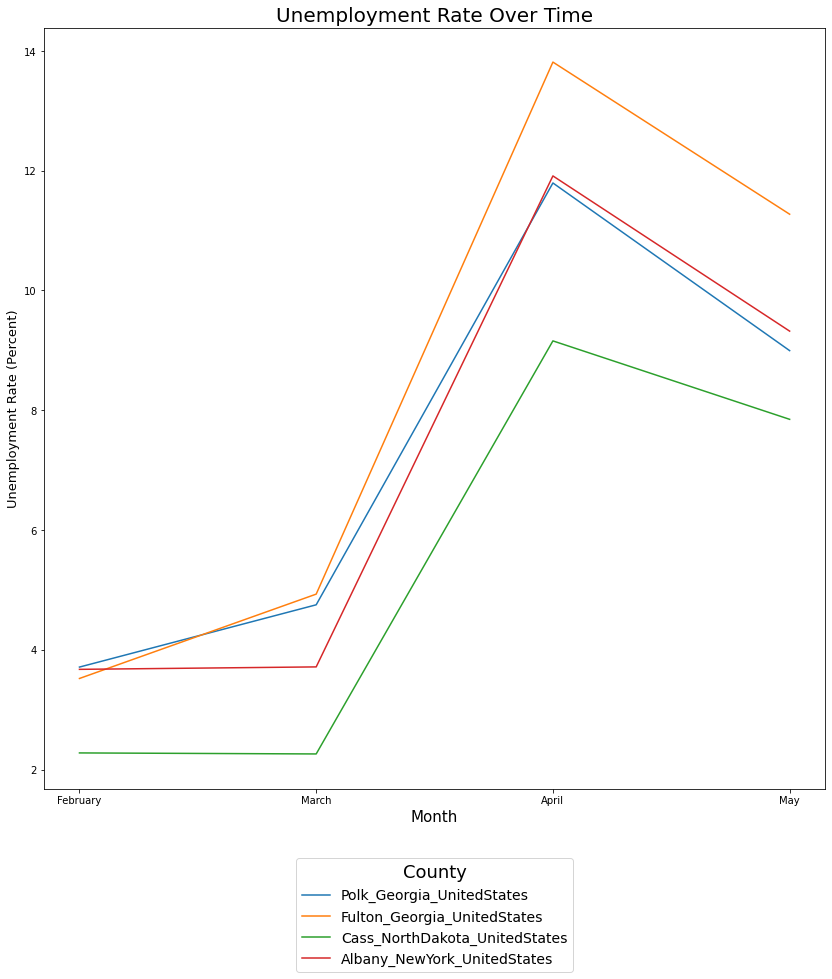

In [57]:
plt.figure(figsize = (14, 14))
x = ["February", "March", "April", "May"]
for each in county_employ_dict:
    plt.plot(x, county_employ_dict[each], label = each)

plt.xlabel("Month", fontsize = 15)
plt.ylabel("Unemployment Rate (Percent)", fontsize = 13)
plt.title("Unemployment Rate Over Time", fontsize = 20)
plt.legend( loc='lower center', bbox_to_anchor=(.5, -.25), fontsize = 14, title = "County", title_fontsize = 18)
plt.show()